In [100]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv("data/city_data.csv")
ridedata = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset
combined_data = pd.merge(citydata,ridedata,on = ["city","city"])
# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [101]:
rides = combined_data.groupby(['type','city']) \
                                   .agg({'ride_id':'size'}) \
                                   .reset_index()
rides.head()

,type,city,ride_id
0,Rural,Bradshawfurt,10
1,Rural,Garzaport,3
2,Rural,Harringtonfort,6
3,Rural,Jessicaport,6
4,Rural,Lake Jamie,6


In [102]:
ave_fare = combined_data.groupby(['type','city']) \
                                       .agg({'fare':'mean','ride_id':'size'}) \
                                       .reset_index()

ave_fare["colors"] = np.where(ave_fare["type"]=="Urban","Light Coral",np.where(ave_fare["type"]=="Suburban","Light Sky Blue","Gold"))
ave_fare.head()

,type,city,fare,ride_id,colors
0,Rural,Bradshawfurt,40.064000,10,Gold
1,Rural,Garzaport,24.123333,3,Gold
2,Rural,Harringtonfort,33.470000,6,Gold
3,Rural,Jessicaport,36.013333,6,Gold
4,Rural,Lake Jamie,34.358333,6,Gold


In [103]:
def pltcolor(parm1):
    cols={}
    for l in parm1:
        if l=="Urban":
            cols[l] = 'lightcoral'
        elif l=='Suburban':
            cols[l] = 'lightskyblue'
        else:
            cols[l] = "gold"
    return cols

cols=pltcolor(ave_fare.type)

<function matplotlib.pyplot.show(*args, **kw)>

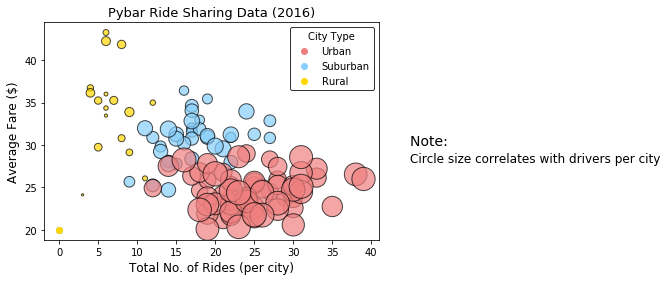

In [104]:
plt.title("Pybar Ride Sharing Data (2016)",fontsize=13)
plt.xlabel("Total No. of Rides (per city)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)

coral_dot, = plt.plot(20,"lightcoral", marker="o", linestyle='')
blue_dot, = plt.plot(20, "lightskyblue", marker="o", linestyle='')
gold_dot, = plt.plot(20, "gold", marker="o", linestyle='')


plt.legend([coral_dot,blue_dot,gold_dot],["Urban", "Suburban","Rural"],title="City Type",edgecolor="black",loc ='best')

plt.text(45, 30, "Note: ", fontsize=14)
plt.text(45, 28, "Circle size correlates with drivers per city", fontsize=12)


s = [5*n for n in range(len(rides))]

plt.scatter(rides.ride_id,ave_fare.fare,s = s,c = ave_fare.type.apply(lambda x: cols[x]),marker ="o", edgecolor ="black", alpha=.7)
plt.savefig("../Images/PyPies1.png",)
plt.show

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

In [105]:
# Calculate Type Percents
Total_fare = combined_data.groupby(['type']) \
                                   .agg({'fare':'sum'}) \
                                   .reset_index()
Total_fare

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [113]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [4327.93, 19356.33, 39854.38]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1)

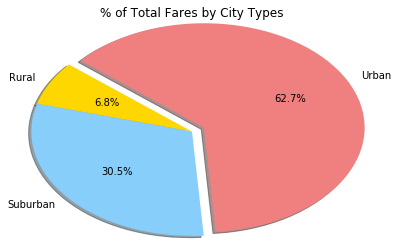

In [117]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",radius=1.2, shadow=True, startangle=140)

plt.title("% of Total Fares by City Types")
plt.savefig("../Images/PyPies2.png",)
plt.show()

## Total Rides by City Type

In [118]:
# Calculate Ride Percents
Total_ride = combined_data.groupby(['type']) \
                                   .agg({'ride_id':'size'}) \
                                   .reset_index()
Total_ride

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


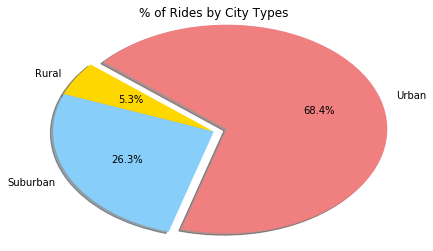

In [124]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [125,625, 1625]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",radius=1.2, shadow=True, startangle=140)

plt.title("% of Rides by City Types")
plt.savefig("../Images/PyPies3.png",)
plt.show()

## Total Drivers by City Type

In [96]:
# Calculate Driver Percents
Total_driver = combined_data.groupby(['type']) \
                                   .agg({'driver_count':'sum'}) \
                                   .reset_index()
Total_driver

,type,driver_count
0,Rural,537
1,Suburban,8570
2,Urban,59602


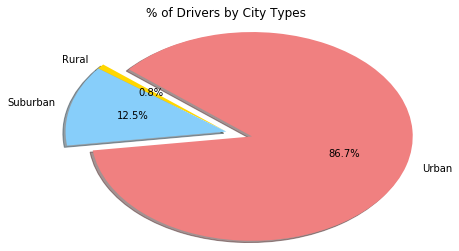

In [126]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [537,8570, 59602]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .2)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",radius=1.2, shadow=True, startangle=140)

plt.title("% of Drivers by City Types")

plt.savefig("../Images/PyPies4.png",)
plt.show()

In [98]:

print("1)Urban has most customer, as well as most drivers,")
print("2)Urban cities generate most revenue than any other city types.")
print("3)Average fares are lowest in Urban cities.")

1)Urban has most customer, as well as most drivers,
2)Urban cities generate most revenue than any other city types.
3)Average fares are lowest in Urban cities.
